# Module 04: Advection Dominated Problems

## Lejo Flores



In [1]:
import numpy as np
import matplotlib.pyplot as plt

dx = 5.0
dt = 10.0

xmin = 0.0
xmax = 4000.0

t0 = 0.0
tf = 10000.0

Ks = 15.0
dhdx = 30.0

Ks = Ks/100.0*365.25
dhdx = dhdx*(1/5280.0)

In [2]:
q = Ks*dhdx

print('The Darcy velocity is ' + '{:.3f}'.format(q) + ' [m/yr]')

The Darcy velocity is 0.311 [m/yr]


In [3]:
x = np.arange(xmin+dx/2, xmax, dx)
Nx = x.size

print('The number of cells is: Nx = ' + str(Nx))

The number of cells is: Nx = 800


In [4]:
t = np.arange(t0,tf+dt,dt)
Nt = t.size
print('The number of time steps: Nt = ' + str(Nt))

The number of time steps: Nt = 1001


### Setup Initial and Boundary Conditions

In [5]:
# Initial condition: concentration is 0 Bq/g everywhere except at x = 0,
# where it is 1 Bq/g
c0 = np.zeros((Nx,1))
c0[0] = 1

# Boundary condition: concentration is 1 Bq/g at x = 0 for all times
cx0 = np.zeros((Nt))
cx0[0:19] = 1.0


### Preallocate Container for Solution

In [6]:
C = np.zeros((Nx,Nt))


### Compute Solution

In [7]:
for i in np.arange(Nt):
    
    # Get initial conditions
    if (i==0):
        Cprev = c0
    else:
        Cprev = C[:,i-1]
    
    Cnext = np.zeros((Nx))
    
    for j in np.arange(Nx):
        
        if (j==0):
            Cnext[0] = cx0[i]
        else:
            Cnext[j] = Cprev[j] + q*(dt/dx)*(Cprev[j-1] - Cprev[j])
        
    C[:,i] = Cnext

### Plot solutions

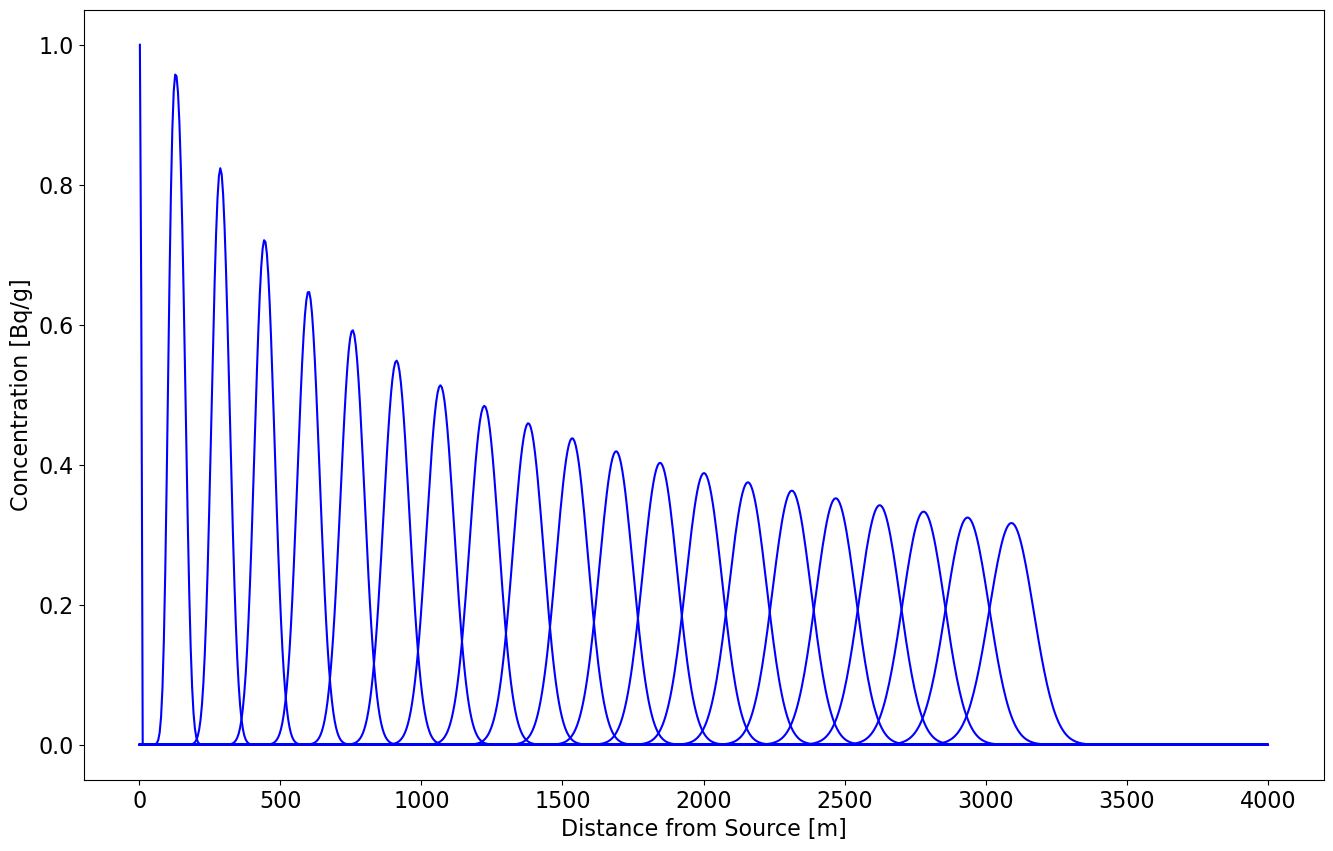

In [8]:
## First off, let's change the font size for all of our plots to be more legible
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(16,10))

for p in np.arange(0,Nt,50):
    plt.plot(x,C[:,p],'b')

plt.ylabel('Concentration [Bq/g]')
plt.xlabel('Distance from Source [m]')
plt.show()

<ipython-input-9-529207984c4f>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(tt,xx,C,cmap='plasma')


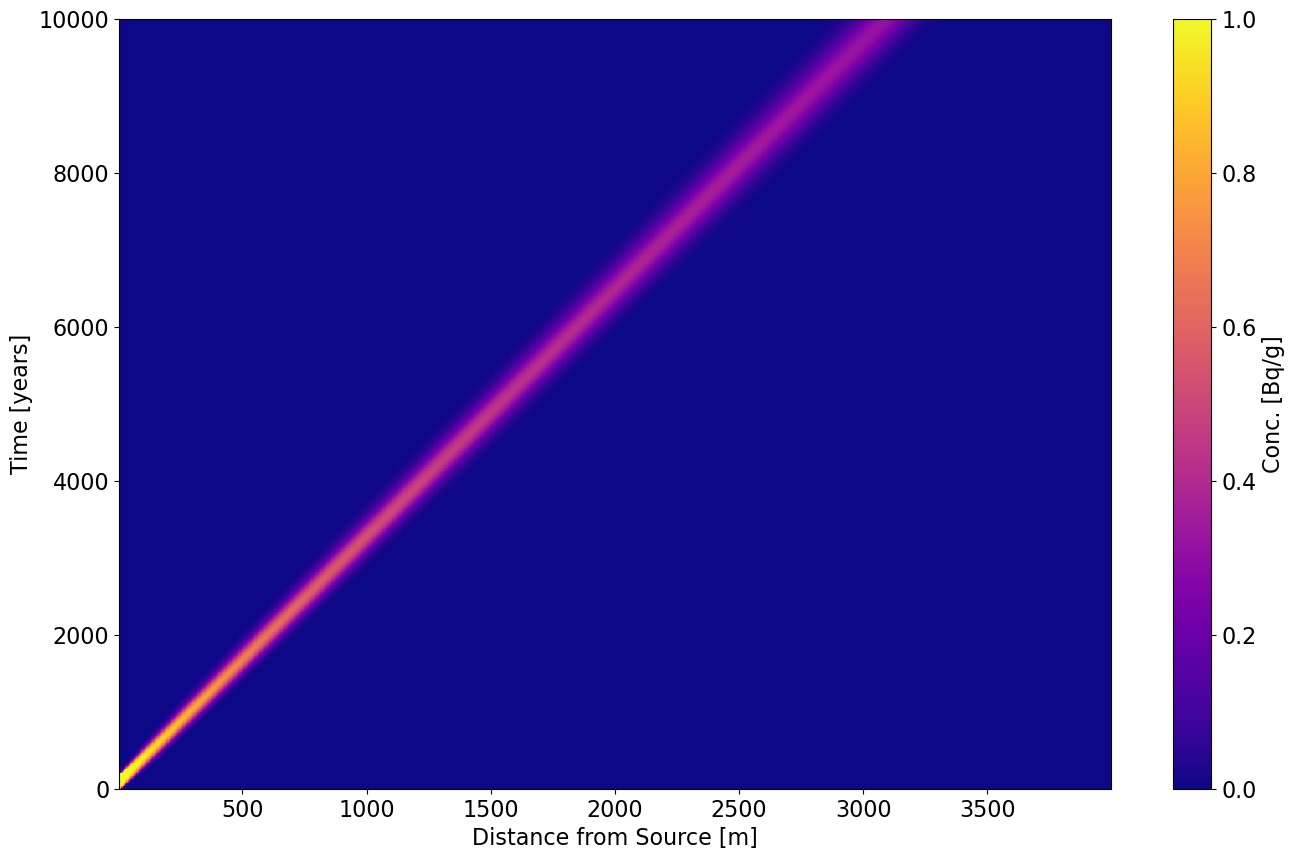

In [9]:
xx,tt = np.meshgrid(t,x)

plt.figure(figsize=(16,10))

plt.pcolormesh(tt,xx,C,cmap='plasma') 
plt.colorbar(label='Conc. [Bq/g]')
plt.xlabel('Distance from Source [m]')
plt.ylabel('Time [years]')
plt.show()